<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/nebius_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal models with Nebius

This notebook demonstrates how to use multimodal models from [Nebius AI Studio](https://studio.nebius.ai/) with LlamaIndex. Nebius AI Studio implements all state-of-the-art multimodal models available for commercial use.

First, let's install LlamaIndex and dependencies of Nebius AI Studio. Since AI Studio uses OpenAI-compatible OpenAI, installation of the OpenAI Multimodal package inside Llama-index is also required. 

In [ ]:
%pip install llama-index-multi-modal-llms-nebius llama-index matplotlib

Upload your Nebius AI Studio key from system variables below or simply insert it. You can get it by registering for free at [Nebius AI Studio](https://auth.eu.nebius.com/ui/login) and issuing the key at [API Keys section](https://studio.nebius.ai/settings/api-keys)."

In [ ]:
import os

NEBIUS_API_KEY = os.getenv("NEBIUS_API_KEY")  # NEBIUS_API_KEY = ""

##  Use Qwen to understand Images from URLs

## Initialize `NebiusMultiModal` and Load Images from URLs

In [ ]:
from llama_index.multi_modal_llms.nebius import NebiusMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    "https://townsquare.media/site/442/files/2018/06/wall-e-eve.jpg",
]

image_documents = load_image_urls(image_urls)

mm_llm = NebiusMultiModal(
    model="Qwen/Qwen2-VL-72B-Instruct",
    api_key=NEBIUS_API_KEY,
    max_new_tokens=300,
)

https://townsquare.media/site/442/files/2018/06/wall-e-eve.jpg


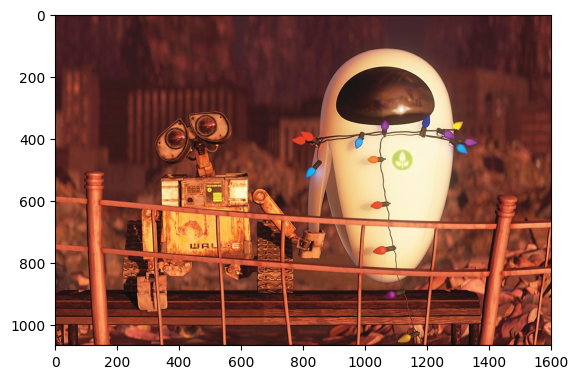

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

The image depicts two animated characters from a popular animated movie. On the left, there is a small, rusty, cube-shaped robot with large, expressive eyes and a pair of mechanical arms. This robot is standing on a metal platform. On the right, there is a larger, sleek, white robot with a dome-shaped head and a green logo on its chest. This robot is adorned with a string of colorful Christmas lights. The background appears to be a desolate, post-apocalyptic landscape with a reddish hue.


### Stream Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = mm_llm.stream_complete(
    prompt="give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

This image features two animated characters from the movie "WALL-E." The character on the left is WALL-E, a small, cube-shaped robot with large, expressive eyes and a yellow body. WALL-E is a waste-compacting robot designed to clean up Earth, which has become uninhabitable due to pollution and waste. The character on the right is EVE, a sleek, white robot with a dome-shaped head and a green plant symbol on her chest. EVE is an advanced probe sent to Earth to search for signs of life. The scene depicts WALL-E and EVE together, with EVE adorned with colorful string lights, suggesting a moment of connection or celebration between the two characters. The background shows a desolate, post-apocalyptic Earth, emphasizing the themes of environmental degradation and the importance of renewal and hope.

### Chat through a list of chat messages

In [ ]:
from llama_index.multi_modal_llms.openai.utils import (
    generate_openai_multi_modal_chat_message,
)

chat_msg_1 = generate_openai_multi_modal_chat_message(
    prompt="Describe the image as an alternative text",
    role="user",
    image_documents=image_documents,
)

chat_msg_2 = generate_openai_multi_modal_chat_message(
    prompt='The image features two animated characters from the movie "WALL-E."',
    role="assistant",
)

chat_msg_3 = generate_openai_multi_modal_chat_message(
    prompt="can I know more?",
    role="user",
)

chat_messages = [chat_msg_1, chat_msg_2, chat_msg_3]
chat_response = mm_llm.chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for msg in chat_messages:
    print(msg.role, msg.content)

MessageRole.USER Describe the image as an alternative text
MessageRole.ASSISTANT The image features two animated characters from the movie "WALL-E."
MessageRole.USER can I know more?


In [ ]:
print(chat_response)

assistant: Certainly! The image depicts a scene from the animated movie "WALL-E," produced by Pixar Animation Studios. The two main characters in the image are WALL-E and EVE. WALL-E is a small, cube-shaped robot with large, expressive eyes and a yellow body, while EVE is a sleek, white robot with a dome-shaped head and a green plant symbol on her chest. The scene shows WALL-E and EVE standing on a metal platform, with WALL-E holding a string of colorful lights. The background appears to be a desolate, post-apocalyptic environment, which is a central theme in the movie.


### Stream Chat through a list of chat messages

In [ ]:
stream_chat_response = mm_llm.stream_chat(
    messages=chat_messages,
)

In [ ]:
for r in stream_chat_response:
    print(r.delta, end="")

Certainly! The image depicts a scene from the animated movie "WALL-E," produced by Pixar Animation Studios. The two main characters in the image are WALL-E and EVE. WALL-E is a small, cube-shaped robot with large, expressive eyes and a yellow body, while EVE is a sleek, white robot with a dome-shaped head and a green plant symbol on her chest. The scene shows WALL-E and EVE standing on a metal platform, with WALL-E holding a string of colorful lights. The background is a desolate, post-apocalyptic landscape, typical of the setting in the movie.

### Async Complete

In [ ]:
response_acomplete = await mm_llm.acomplete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(response_acomplete)

The image depicts two animated characters from a popular animated movie. On the left, there is a small, rusty, cube-shaped robot with large, expressive eyes and a yellow body. This robot is standing on a metal platform. On the right, there is a larger, sleek, white robot with a dome-shaped head and a green logo on its chest. This robot is adorned with a string of colorful Christmas lights. The background features a desolate, post-apocalyptic landscape with tall, rusted structures and a warm, reddish hue.


### Async Steam Complete

In [ ]:
response_astream_complete = await mm_llm.astream_complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The image depicts two animated robots standing on a wooden bench. The robot on the left is a small, boxy, yellow machine with large, expressive eyes and a weathered appearance, suggesting it has been around for a long time. The robot on the right is larger, with a smooth, white exterior and a large, dark visor. This robot is adorned with a string of colorful Christmas lights wrapped around its body. The background appears to be a desolate, post-apocalyptic landscape with rusted metal structures and a reddish hue, indicating a harsh environment.

### Async Chat

In [ ]:
achat_response = await mm_llm.achat(
    messages=chat_messages,
)

In [ ]:
print(achat_response)

assistant: Certainly! The image depicts a scene from the animated movie "WALL-E," produced by Pixar Animation Studios. The two main characters in the image are WALL-E and EVE. WALL-E is a small, rectangular robot with large, expressive eyes and a yellow body, while EVE is a sleek, white robot with a dome-shaped head and a green plant symbol on her chest. In this scene, WALL-E is standing on a metal structure, looking up at EVE, who is adorned with a string of colorful lights. The background suggests a post-apocalyptic setting with a desolate, rusty environment. The scene captures a moment of curiosity and connection between the two robots.


### Async stream Chat

In [ ]:
astream_chat_response = await mm_llm.astream_chat(
    messages=chat_messages,
)

In [ ]:
async for delta in astream_chat_response:
    print(delta.delta, end="")

Certainly! The image depicts a scene from the animated movie "WALL-E," produced by Pixar Animation Studios. The two characters in the image are WALL-E and EVE. WALL-E is a small, cube-shaped robot with large, expressive eyes and a yellow body, while EVE is a sleek, white robot with a dome-shaped head and a green plant symbol on her chest. The scene shows WALL-E and EVE standing on a metal platform, with WALL-E holding a string of colorful Christmas lights. The background appears to be a desolate, post-apocalyptic environment, consistent with the setting of the movie.

##  Use Qwen to understand images from local files

In [ ]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.nebius import NebiusMultiModal

# put your local directory here
path_to_images = "/mnt/share/nebius/images"
image_documents = SimpleDirectoryReader(path_to_images).load_data()

mm_llm = NebiusMultiModal(
    model="Qwen/Qwen2-VL-72B-Instruct",
    api_key=NEBIUS_API_KEY,
    max_new_tokens=300,
)

response = mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

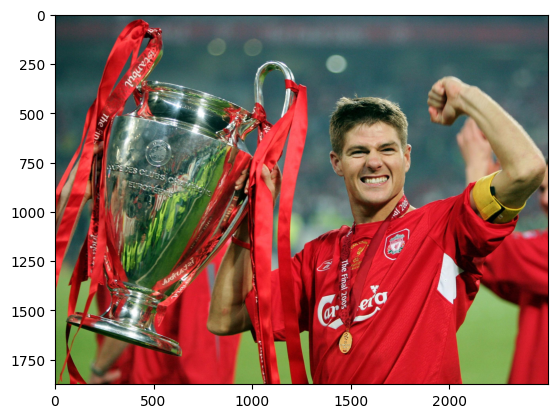

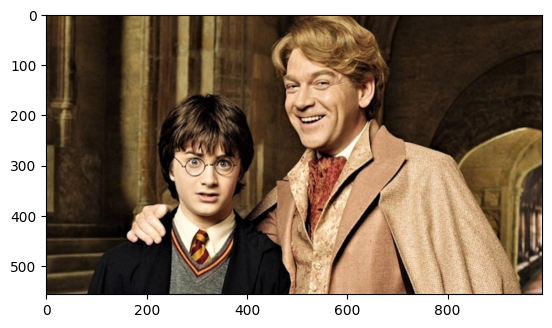

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

for image_name in os.listdir(path_to_images):
    img = Image.open(os.path.join(path_to_images, image_name))
    plt.imshow(img)
    plt.show()

In [ ]:
print(response)

**Image 1:**
A soccer player is holding a large silver trophy with red ribbons attached to it. The player is wearing a red jersey with the word "Carlsberg" on it and has a gold medal around his neck. He is raising his right fist in a celebratory gesture.

**Image 2:**
Two characters are standing in a grand, stone-walled room. The character on the left is wearing a black robe with a red and yellow tie, while the character on the right is dressed in a brown robe with a red tie and a patterned shirt underneath. The character on the right has his arm around the shoulder of the character on the left.
